In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [591]:
df = pd.read_csv('laboratory_data.csv')
df.head()

,Gender,Age,Hemoglobin,RBC,WBC,AST (aspartate aminotransferase),ALT (alanine aminotransferase),Cholestrol,Spirometry,Creatinine,Glucose,Lipase,Troponin,Disease
0,Male,59,6,1.20,6220,26,22,227,4.75,0.90,96,97,0.02,Anemia
1,Male,71,40,20.00,6636,18,27,220,3.93,1.03,94,82,0.04,Asthma
2,Female,22,14,3.55,18314,21,30,224,3.93,1.17,70,101,0.00,Infection
3,Male,53,16,4.95,9931,45,62,205,3.58,0.81,82,108,0.03,Liver Disease
4,Male,77,16,3.96,7088,29,25,217,3.20,1.70,97,107,0.04,Liver Disease


In [592]:
df.duplicated().sum()

0

In [593]:
df.dtypes

Gender                               object
Age                                   int64
Hemoglobin                            int64
RBC                                 float64
WBC                                   int64
AST (aspartate aminotransferase)      int64
ALT (alanine aminotransferase)        int64
Cholestrol                            int64
Spirometry                          float64
Creatinine                          float64
Glucose                               int64
Lipase                                int64
Troponin                            float64
Disease                              object
dtype: object

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            12009 non-null  object 
 1   Age                               12009 non-null  int64  
 2   Hemoglobin                        12009 non-null  int64  
 3   RBC                               12009 non-null  float64
 4   WBC                               12009 non-null  int64  
 5   AST (aspartate aminotransferase)  12009 non-null  int64  
 6   ALT (alanine aminotransferase)    12009 non-null  int64  
 7   Cholestrol                        12009 non-null  int64  
 8   Spirometry                        12009 non-null  float64
 9   Creatinine                        12009 non-null  float64
 10  Glucose                           12009 non-null  int64  
 11  Lipase                            12009 non-null  int64  
 12  Trop

In [595]:
df.describe()

,Age,Hemoglobin,RBC,WBC,AST (aspartate aminotransferase),ALT (alanine aminotransferase),Cholestrol,Spirometry,Creatinine,Glucose,Lipase,Troponin
count,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000,12009.000000
mean,54.415438,11.988342,3.421939,9154.022317,24.613457,31.168873,217.975685,3.798141,1.099124,90.801815,101.816554,0.027720
std,21.160408,4.681409,1.925999,3922.574987,8.150145,11.565622,13.956727,0.887210,0.295349,18.361879,27.901340,0.023478
min,18.000000,2.000000,0.110000,6005.000000,15.000000,20.000000,200.000000,1.010000,0.800000,70.000000,70.000000,0.000000
25%,36.000000,6.000000,1.120000,7061.000000,19.000000,24.000000,208.000000,3.390000,0.910000,78.000000,83.000000,0.010000
50%,55.000000,14.000000,4.000000,8187.000000,23.000000,28.000000,216.000000,3.940000,1.030000,87.000000,97.000000,0.020000
75%,73.000000,15.000000,4.530000,9207.000000,28.000000,33.000000,224.000000,4.440000,1.140000,96.000000,110.000000,0.030000
max,90.000000,50.000000,34.000000,27901.000000,50.000000,70.000000,281.000000,5.010000,2.000000,157.000000,202.000000,0.100000


In [596]:
df.describe(include='object')

,Gender,Disease
count,12009,12009
unique,2,9
top,Female,Anemia
freq,6209,2979


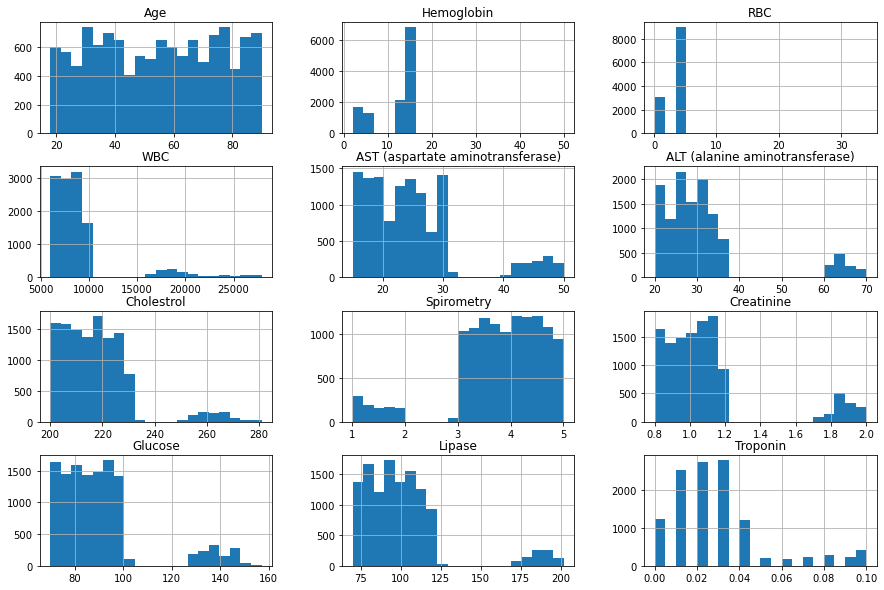

In [597]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

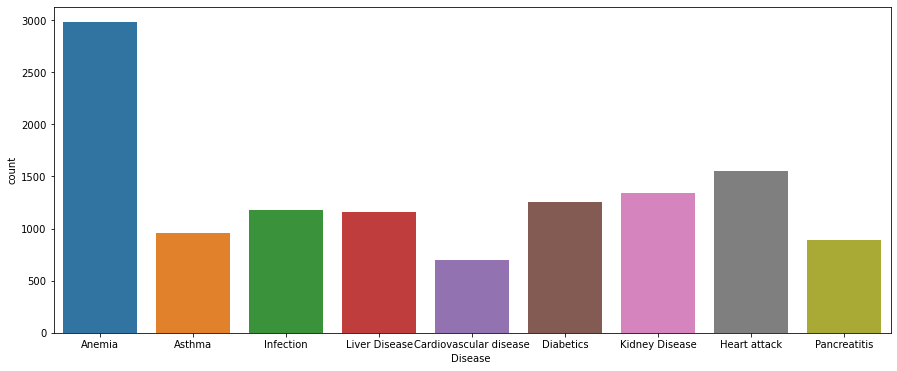

In [598]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Disease ', data=df)
plt.show()

In [599]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [600]:
df['Gender'] = le.fit_transform(df['Gender'])

In [601]:
df['Disease '] = le.fit_transform(df['Disease '])

In [602]:
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Mapping:
Anemia: 0
Asthma: 1
Cardiovascular disease: 2
Diabetics: 3
Heart attack: 4
Infection: 5
Kidney Disease: 6
Liver Disease: 7
Pancreatitis: 8


In [603]:
x = df.values[:,:13]

In [604]:
y = df.values[:,13]

In [605]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [606]:
print("Total length of the dataset: ",len(df))
print("Total length of training data: ",len(X_train))
print("Total length of testing data: ",len(X_test))

Total length of the dataset:  12009
Total length of training data:  9607
Total length of testing data:  2402


In [607]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

pred= rf.predict(X_test)

In [608]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [609]:
print("Accuracy for Random Forest: ", accuracy_score(y_test, pred)*100)

Accuracy for Random Forest:  76.93588676103246


In [610]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

In [611]:
print("Accuracy for XGB Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for XGB Classifier:  94.12989175686928


In [612]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 42)

lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.381621
[LightGBM] [Info] Start training from score -2.535614
[LightGBM] [Info] Start training from score -2.863972
[LightGBM] [Info] Start training from score -2.279638
[LightGBM] [Info] Start training from score -2.038549
[LightGBM] [Info] Start training from score -2.320121
[LightGBM] [Info] Start training from score -2.208951
[LightGBM] [Info] Start training from score -2.344787
[LightGBM] [Info] Start training from score -2.575834


In [613]:
print("Accuracy for LGBM Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for LGBM Classifier:  93.83846794338052


In [614]:
from sklearn.ensemble import VotingClassifier

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model),
        ('lightgbm', lgbm_model)
    ],
    voting='soft'
)

In [615]:
voting_classifier.fit(X_train, y_train)

predictions = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)*100
print(f"Ensemble Model Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.381621
[LightGBM] [Info] Start training from score -2.535614
[LightGBM] [Info] Start training from score -2.863972
[LightGBM] [Info] Start training from score -2.279638
[LightGBM] [Info] Start training from score -2.038549
[LightGBM] [Info] Start training from score -2.320121
[LightGBM] [Info] Start training from score -2.208951
[LightGBM] [Info] Start training from score -2.344787
[LightGBM] [Info] Start training from score -2.575834
Ensemble Model Accuracy: 93.96336386344713


In [616]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(voting_classifier, files)

In [617]:
import sklearn

print(sklearn.__version__)

1.0.2


In [618]:
output_file = 'model.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(rf, file)

In [619]:
inp = np.array([0, 59, 6, 1.20, 6220, 26, 22, 227, 4.75, 0.90, 96, 97, 0.02])
inp1 = inp.reshape(1,-1)
pred = voting_classifier.predict(inp1)
print(pred)

[0.]


In [620]:
vc_acc =  accuracy_score(predictions, y_test)*100
print(vc_acc)

93.96336386344713


In [621]:
vc_prec = precision_score(predictions, y_test, average='macro') *100
print(vc_prec)

93.2864997605211


In [622]:
vc_recall = recall_score(predictions, y_test, average='macro')*100
print(vc_recall)

94.0129744917457


In [623]:
vc_f1 = f1_score(predictions, y_test, average='macro')*100
print(vc_f1)

93.6327302260775


In [624]:
metrics = {
    'Accuracy': vc_acc,
    'Precision': vc_prec,
    'Recall': vc_recall,
    'F1 Score': vc_f1,
}

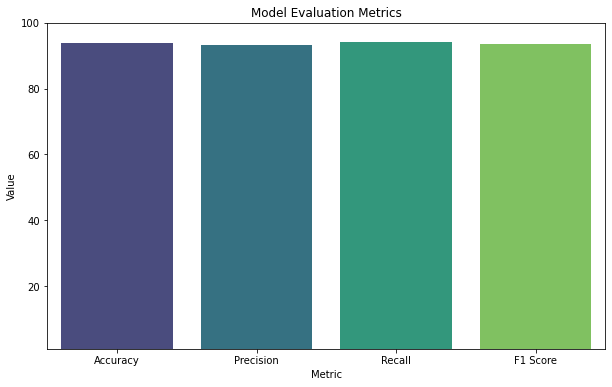

In [625]:
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(1, 100)  # Set the y-axis limit to match the range of metric values (0 to 1 for percentages)
plt.show()